In [1]:
#importing preprocessing 
%run 'Preprocessing.ipynb'

Using TensorFlow backend.


In [2]:
# Import all need library
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical

In [3]:
#Save your each sample of data to array in .npy formate
#save_data_to_array()

In [5]:
#spliting the dataset into train and test, where 75% dataset for train and 25% dataset for test 
X_train, X_test, y_train, y_test = split_train_test()

In [6]:
X_train.shape

(21689, 20, 11)

In [7]:
#Reshape train data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [8]:
X_test.shape

(7230, 20, 11)

In [9]:
#reshape test data
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [10]:
#one hot encoding 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
#train model 
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(48, (2, 2), activation='relu'))
model.add(Conv2D(120, (2, 2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(13, activation='softmax'))

In [12]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 10, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 9, 48)         6192      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 8, 120)        23160     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 4, 120)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 4, 120)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               491648    
__________

In [14]:
#Fit model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100)

Train on 21689 samples, validate on 7230 samples
Epoch 1/30
21689/21689 [==============================] - 54s 2ms/step - loss: 2.3180 - acc: 0.2281 - val_loss: 1.4743 - val_acc: 0.5387
Epoch 2/30
21689/21689 [==============================] - 67s 3ms/step - loss: 1.4397 - acc: 0.5177 - val_loss: 0.8155 - val_acc: 0.7474
Epoch 3/30
21689/21689 [==============================] - 73s 3ms/step - loss: 0.9943 - acc: 0.6808 - val_loss: 0.6467 - val_acc: 0.8109
Epoch 4/30
21689/21689 [==============================] - 81s 4ms/step - loss: 0.7796 - acc: 0.7590 - val_loss: 0.4803 - val_acc: 0.8599
Epoch 5/30
21689/21689 [==============================] - 63s 3ms/step - loss: 0.6674 - acc: 0.7934 - val_loss: 0.4619 - val_acc: 0.8636
Epoch 6/30
21689/21689 [==============================] - 73s 3ms/step - loss: 0.5950 - acc: 0.8191 - val_loss: 0.4028 - val_acc: 0.8806
Epoch 7/30
21689/21689 [==============================] - 68s 3ms/step - loss: 0.5239 - acc: 0.8401 - val_loss: 0.4063 - val_acc:

### Prediction

In [15]:
# For prediction
def predict(filepath, model):
    sample = Wav2MFCC(filepath)
    sample_reshaped = sample.reshape(1, 20, 11, 1)
    return get_label()[0][np.argmax(model.predict(sample_reshaped))]

In [29]:
wave = './audio/yes/1cbcc7a7_nohash_0.wav'

In [30]:
print('Predicted Audio is ----> ', predict(wave, model=model))

Predicted Audio is ---->  yes


### Visualization

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio

In [25]:
# loading your predication data
wave, sr = librosa.load(wave, mono=True, sr=None)

In [26]:
#Audio file
Audio(data=wave, rate=sr)

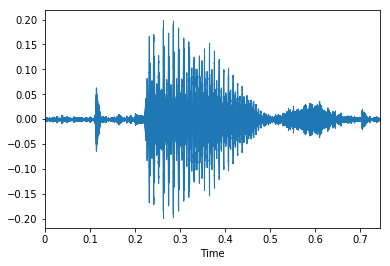

In [27]:
#Ploting your wave
import librosa.display
librosa.display.waveplot(wave, sr)